# Week 4, Honors, Gadfly

Please note that this notebook was created in Julia version 0.4.6.

#### After importing `Gadfly` and `DataFrames`, answer the following questions by creating the appropriate code.

In [2]:
using Gadfly, DataFrames, Distributions;

### Question 1

Create a DataFrame called `data` with column names `A`, `B`, `C`, and `D`.  Each column should have $ 30 $ values.

- For column `A` generate $ 30 $ random values in the range $ 1 : 10 $
- For column `B` generate $ 30 $ random values in the range $ 1 : 10 $
- For column `C` generate $ 30 $ random values from the choices `P` and `Q`
- For column `D` generate $ 30 $ random values from the choices `X`, `Y`, and `Z`

In [3]:
# Create the DataFrame called data
data=DataFrame(A = rand(1:10,30), B=rand(1:10,30), C = rand(["P","Q"],30), D = rand(["X", "Y", "Z"],30))

,A,B,C,D
1,9,1,P,Z
2,4,10,P,X
3,1,6,Q,Y
4,3,7,P,Y
5,8,5,P,Y
6,7,5,Q,X
7,7,2,P,Z
8,5,7,P,Z
9,5,10,P,Y
10,7,10,Q,X


### Question 2

Create a scatter plot from columns `A` and `B` using the point geometry.

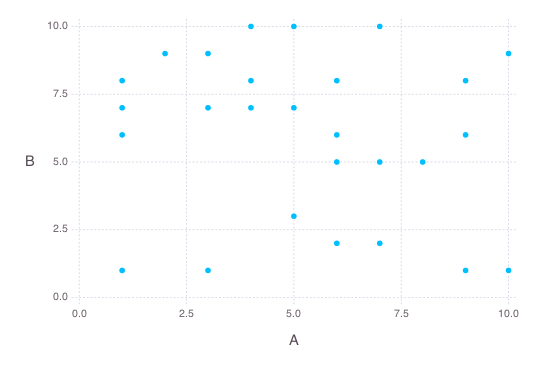

In [4]:
# Create a scatter plot using the point geometry
plot(data, x= :A, y = :B, Geom.point)

### Question 3

Change the point marker color to `gray` and increase the size to `5px`.

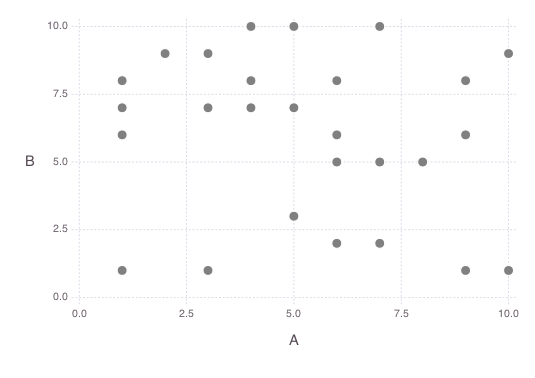

In [5]:
# Change the point marker color to gray and the size to 5px
plot(data, x= :A, y = :B, Geom.point, Theme(default_color="gray", point_size=5px))

### Question 4

Create a (simple) scatter plot using point geometry using values in columns `A` and `B`, but grouped by the unique elements found in column `C`.  Leave all other elements at their default values.

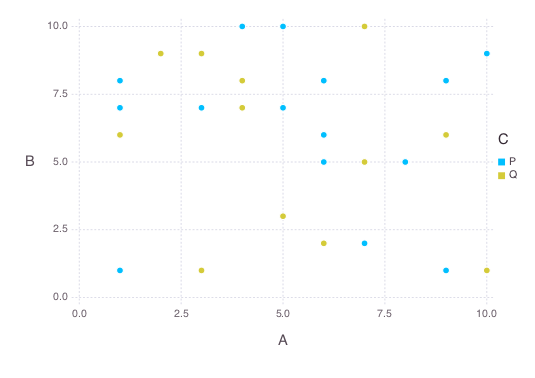

In [6]:
# Create a scatter plot using point geometry from the values in columns A and B, grouped by column C
plot(data, x = :A, y = :B, Geom.point, color=:C)

### Question 5

Receate the plot in *Question 4*, but change the point marker size to `10px`, with colors `#AAAAAA` and `#777777`.

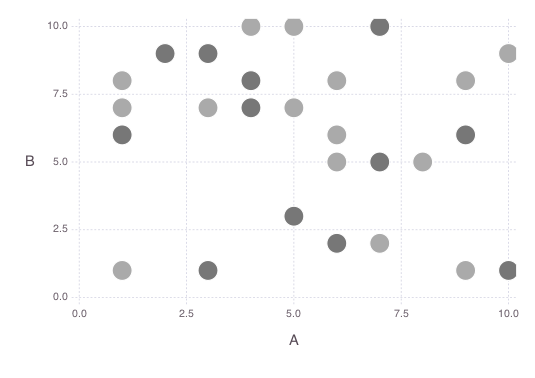

In [7]:
# Recreate the plot in Question 4 with point marker size 10px and colors #AAAAAA and #777777
points1 = layer(data[(data[:C].=="P"),:], x=:A, y=:B, Geom.point, Theme(point_size=10px, default_color="#AAAAAA"));
points2 = layer(data[(data[:C].=="Q"),:], x=:A, y=:B, Geom.point, Theme(point_size=10px, default_color="#777777"));
plot(points1,points2)
#The reader of the code can double check on the resemblance to part 4 by runing the following code: 
#plot(data, x = :A, y = :B, Geom.point, color=:C, Theme(point_size=10px))
#Namely, by plotting the graph appearing in part 4 with the proper scale. 

### Question 6

Create a box plot of the values in column `A` based on the unique values in column `D`.  Render the plot in `grey`.

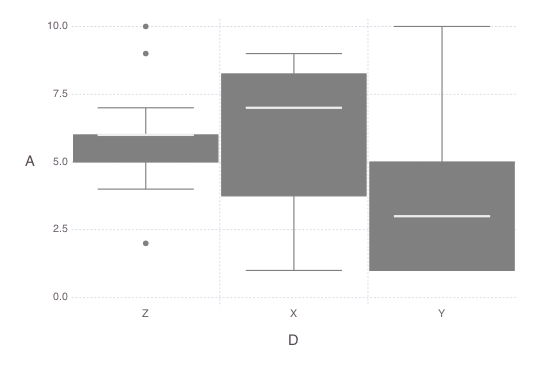

In [8]:
# Create a grey box plot of the values in column A based on the unique values in columns D
plot(data, x=:D, y=:A, Geom.boxplot, Theme(default_color="grey"))

### Question 7

Recreate the plot in Question 6.  Increase the spacing to `50px` and add the plot title "`My plot`".

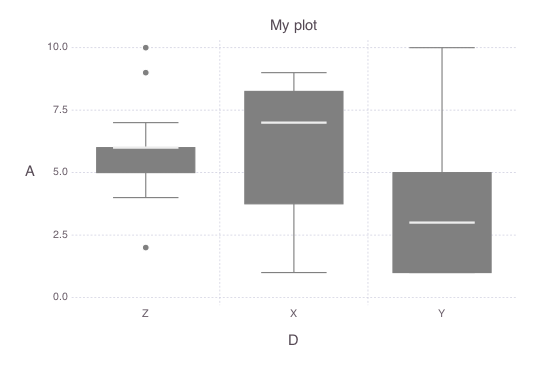

In [9]:
#  Recreate the plot in Question 6 with increased spacing (50px) and add the title My plot
plot(data, x=:D, y=:A, Geom.boxplot, Guide.title("My plot"), Theme(default_color="grey", boxplot_spacing=50px))

### Question 8

Recreate the plot in Question 7 but add a `ygroup` based on the unqiue values in column C.

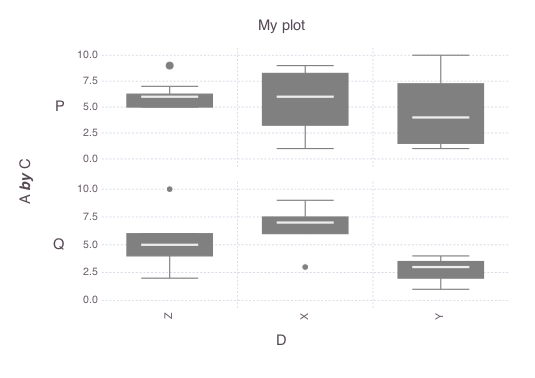

In [10]:
# Recreate the plot in Question 7 but add a ygroup based on the unique values in column C
plot(data, ygroup="C", x="D", y="A",Geom.subplot_grid(Geom.boxplot), Guide.title("My plot"), Theme(default_color="grey", boxplot_spacing=50px))

### Question 9

Add a new column called `E` and add $ 30 $ values from the standard normal distribution.

In [12]:
# Add column E with 30 values form the standard normal distribution
data[:E]=rand(Normal(0,1),30);
data

,A,B,C,D,E
1,9,1,P,Z,1.09264
2,4,10,P,X,-0.615278
3,1,6,Q,Y,-0.279213
4,3,7,P,Y,1.82238
5,8,5,P,Y,0.525924
6,7,5,Q,X,-1.22897
7,7,2,P,Z,0.807151
8,5,7,P,Z,0.863214
9,5,10,P,Y,0.831445
10,7,10,Q,X,-0.398779


### Question 10

Create a density plot using the values in column `E` and draw a vertical line in `red` with size `2px` though the actual mean of the values in column `E`.

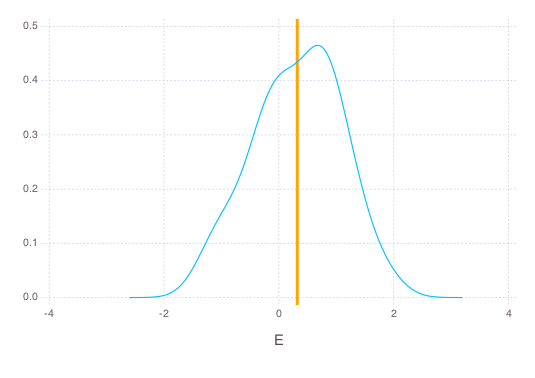

In [13]:
# Create a density plot from the values in column E and draw a 2px red vertical line through the actual mean
plot(data, x =:E, Geom.density, xintercept = [mean(data[:E])], Geom.vline(size = 3px, color = colorant"Orange"))